# Avaliação de Perfil de Clientes para Aprovação de Financiamento de Veículos
Nesse projeto, será desenvolvido um <b>modelo de machine learning</b> com o objetivo de prever e estipular valores aprovados para cada cliente para financiamento de carros. Serão utilizadas técnicas de <b>aprendizado supervisionado</b> com a separação de um dataset para treino e um para teste. Ao final do desenvolvimento do modelo será disponibilizada uma <b>interface gráfica</b> onde o Analista Financeiro, responsável pela simulação, preencherá as informações de cada cliente para serem analisadas.

Utilizarei a seguinte <b>pipeline</b> baseada no <b>CRISP-DM framework:</b>

<b>1. Definição do problema de negócio</b><br>
<b>2. Coletar e ter uma visão inicial dos dados</b><br>
<b>3. Divide os Datasets em treino e teste</b><br>
<b>4. Exploração de dados (EDA: exploratory data analysis)</b><br>
<b>5. Feature engineering, limpeza dos dados and processamento da base</b><br>
<b>6. Treinamento de modelos, comparar, selecionar as melhores features e hypertunning</b><br>
<b>7. Seleção e treinamento do modelo com os melhores resultados</b><br>
<b>8. Conclusão e interpretação dos resultados do modelo final</b><br>
<b>9. Deploy</b><br>

Neste notebook, realizarei uma <b>análise exploratória de dados (EDA)</b>, cobrindo as etapas 1 a 4 do pipeline acima. O principal objetivo aqui é descobrir insights que nos forneçam <b>informações valiosas sobre os padrões dos clientes que solicitam o serviço dentro das características disponíveis</b>. Assim, mesmo antes de construir um modelo, será possível ajudar o banco a identificar perfis e tendências de clientes. Além disso, abordarei essas etapas em detalhes abaixo, explicando o motivo de cada decisão tomada.


### Importando bibliotecas e arquivos necessários

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import const
from utils import *

In [3]:
df = fetch_data_from_db(const.consulta_sql)
df.head()

,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,produto,valorsolicitado,valortotalbem,classe
0,Cientista de Dados,24,58660.0,Outros,Ens.Médio,MuitoBom,58.0,0,Solteiro,VoyageRoamer,84623.00,350000.00,bom
1,Empresário,21,46557.0,Outros,Ens.Médio,MuitoBom,37.0,2,Víuvo,EcoPrestige,126855.00,500000.00,bom
2,Dentista,13,43939.0,Própria,Ens.Médio,Bom,23.0,0,Casado,DoubleDuty,127151.00,320000.00,ruim
3,Engenheiro,10,37262.0,Própria,Superior,Baixo,35.0,0,Divorciado,AgileXplorer,28767.00,250000.00,bom
4,Contador,6,52606.0,Própria,PósouMais,Justo,26.0,0,Casado,TrailConqueror,199564.00,400000.00,ruim


In [4]:
df['idade'] = df['idade'].astype(int)
df['valorsolicitado'] = df['valorsolicitado'].astype(float)
df['valortotalbem'] = df['valortotalbem'].astype(float)

In [5]:
variaveis_categoricas = ['profissao', 'tiporesidencia', 
                         'escolaridade', 'score', 'estadocivil', 'produto']
variaveis_numericas = ['tempoprofissao', 'renda', 'idade',
                        'dependentes', 'valorsolicitado', 'valortotalbem']

### Variáveis Categóricas

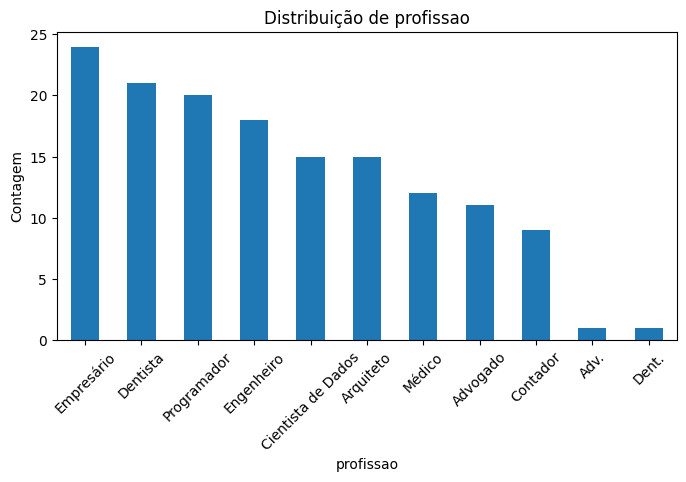

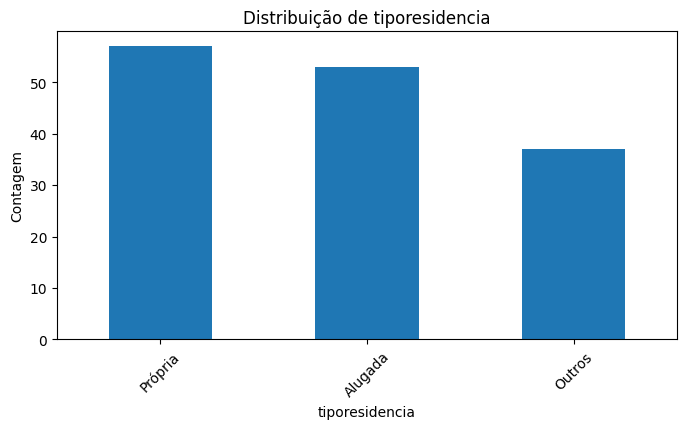

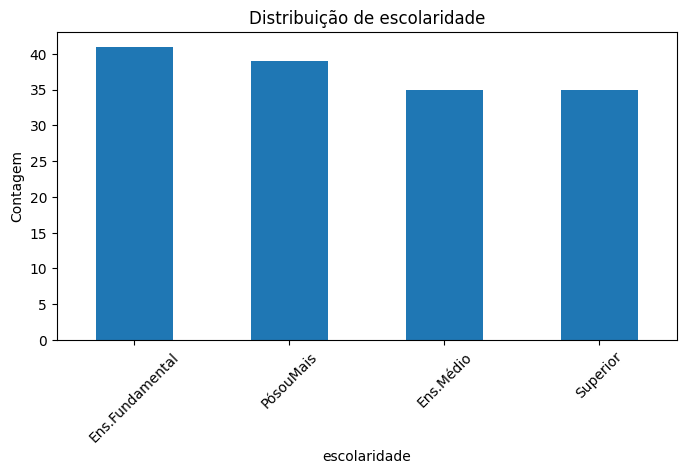

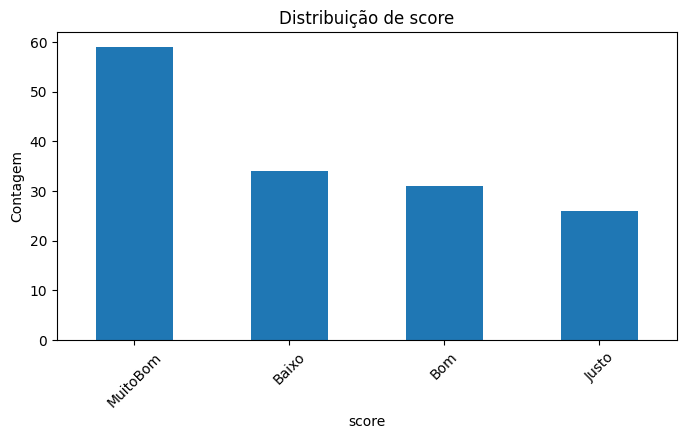

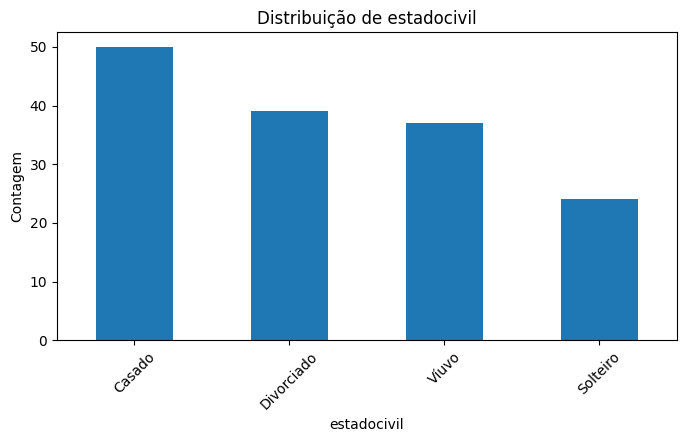

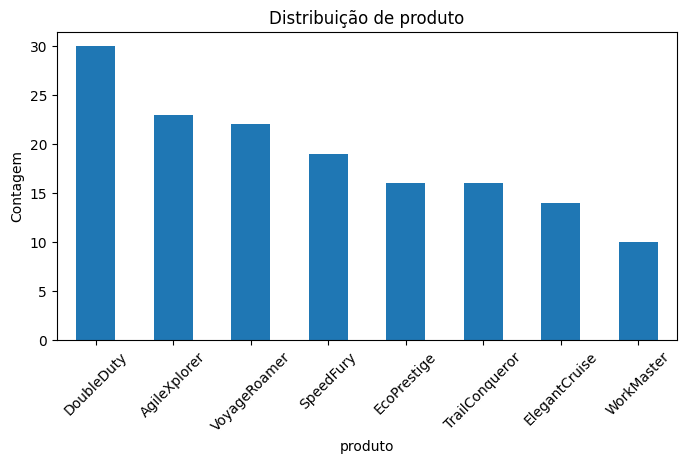

In [6]:
for coluna in variaveis_categoricas:
    df[coluna].value_counts().plot(kind='bar', figsize=(8, 4))
    plt.title(f'Distribuição de {coluna}')
    plt.ylabel('Contagem')
    plt.xlabel(coluna)
    plt.xticks(rotation=45)
    plt.show()

### Variáveis numéricas

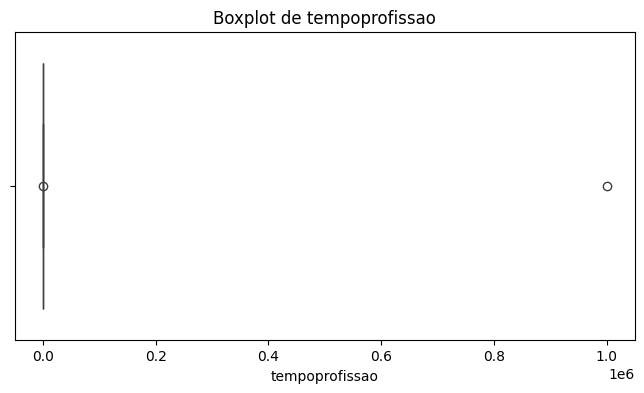

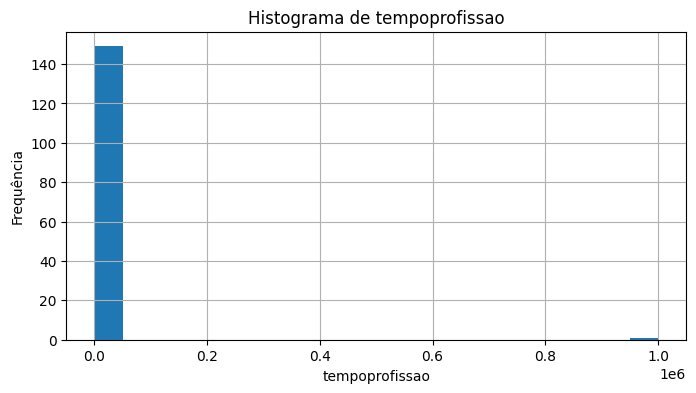

Resumo estatístico de :
 count       150.000000
mean       6690.573333
std       81647.612861
min           0.000000
25%          13.000000
50%          24.000000
75%          32.750000
max      999999.000000
Name: tempoprofissao, dtype: float64 



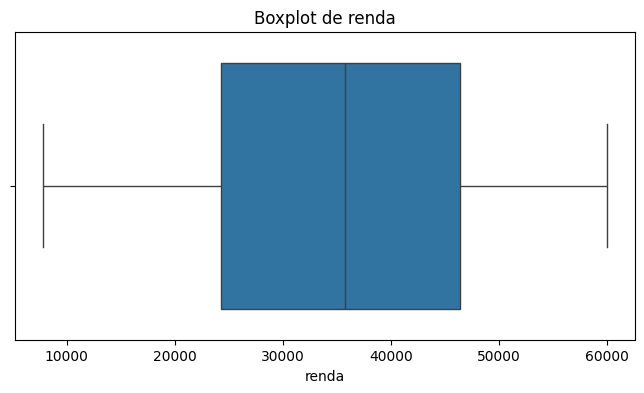

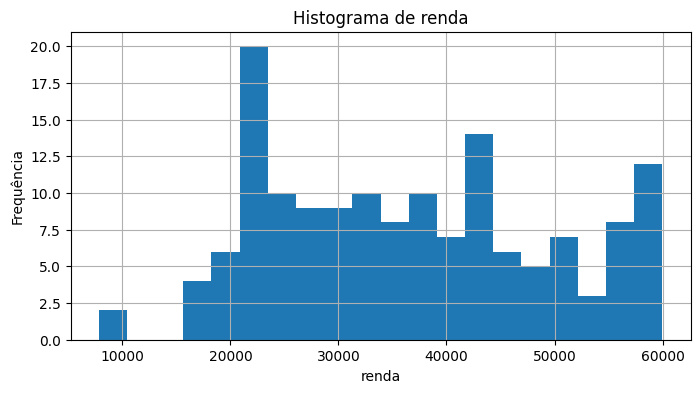

Resumo estatístico de :
 count      150.000000
mean     36406.813333
std      12974.282533
min       7814.000000
25%      24271.750000
50%      35795.000000
75%      46361.000000
max      59976.000000
Name: renda, dtype: float64 



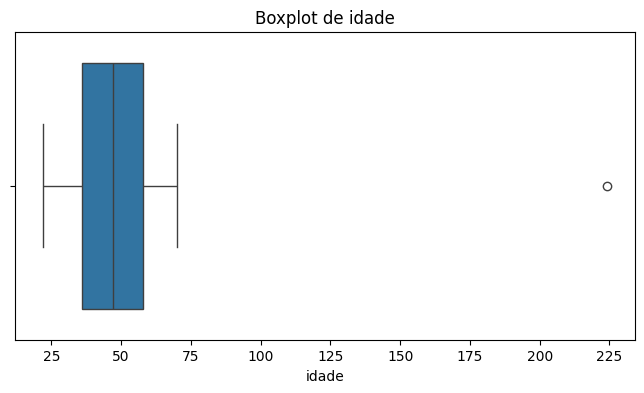

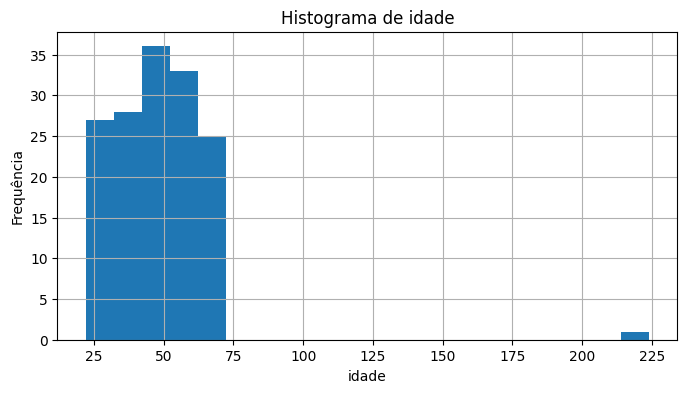

Resumo estatístico de :
 count    150.000000
mean      47.766667
std       19.992756
min       22.000000
25%       36.000000
50%       47.000000
75%       58.000000
max      224.000000
Name: idade, dtype: float64 



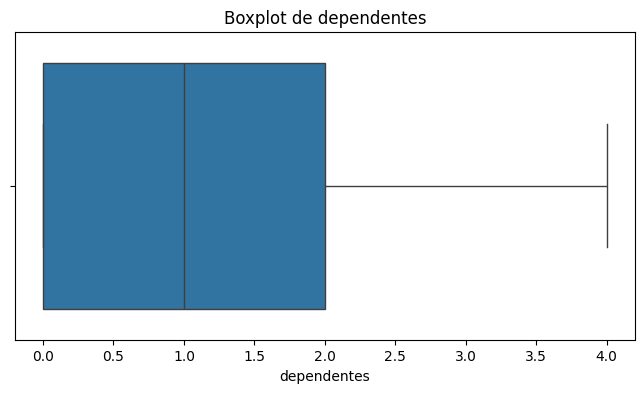

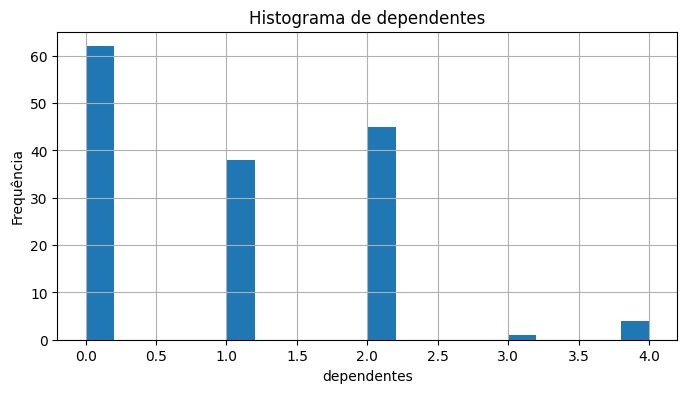

Resumo estatístico de :
 count    150.000000
mean       0.980000
std        0.993063
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: dependentes, dtype: float64 



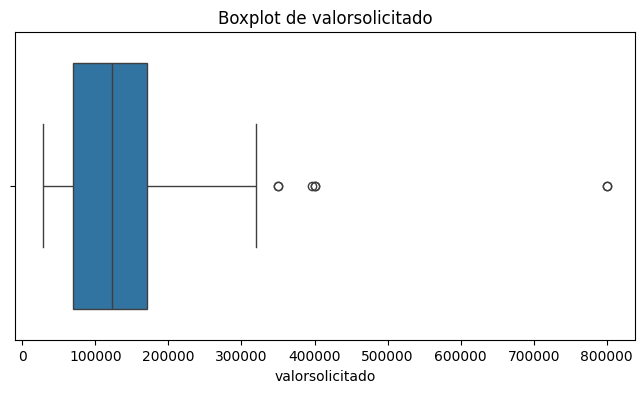

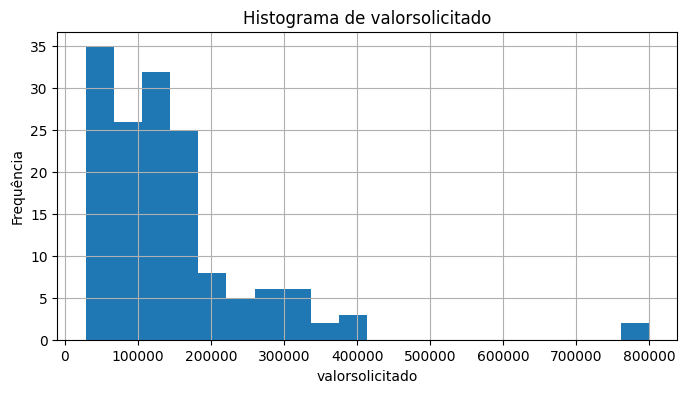

Resumo estatístico de :
 count       150.000000
mean     144512.680000
std      113913.175165
min       28290.000000
25%       69172.000000
50%      123258.000000
75%      170513.750000
max      800000.000000
Name: valorsolicitado, dtype: float64 



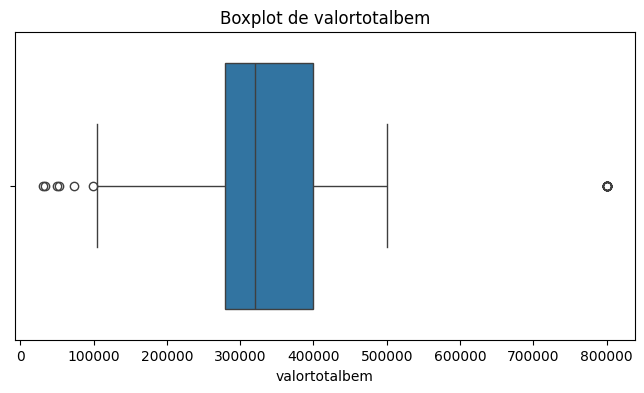

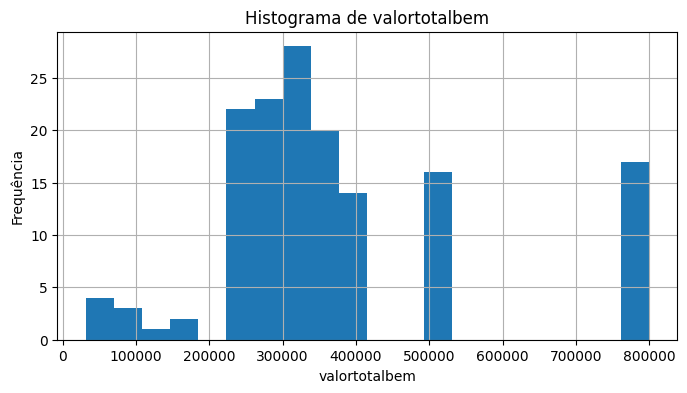

Resumo estatístico de :
 count       150.000000
mean     375161.993333
std      178933.034924
min       31170.000000
25%      280000.000000
50%      320000.000000
75%      400000.000000
max      800000.000000
Name: valortotalbem, dtype: float64 



In [7]:
for coluna in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=coluna)
    plt.title(f'Boxplot de {coluna}')
    plt.show()

    df[coluna].hist(bins=20, figsize=(8, 4))
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

    print(f'Resumo estatístico de :\n', df[coluna].describe(), '\n')

### Tratamento de nulos

In [65]:
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

profissao          3
tempoprofissao     0
renda              0
tiporesidencia     3
escolaridade       0
score              0
idade              0
dependentes        0
estadocivil        0
produto            0
valorsolicitado    0
valortotalbem      0
classe             0
dtype: int64


In [ ]:
while x <= 250